In [1]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

['default', 'despine']


In [2]:
color_dict = { 'Prlf. Ductal': '#f7b6d2', 'Ductal': '#d62728', 'Imm. Acinar': '#ffeb3b', 'Mat. Acinar': '#98df8a',
    'Alpha': '#1f77b4', 'Beta': '#ff7f0e', 'Delta': '#279e68', 'Eps. progenitors': '#aa40fc', 'Epsilon': '#8c564b',
       'Fev+': '#e377c2', 'Fev+ Alpha': '#b5bd61', 'Fev+ Beta': '#aec7e8', 'Fev+ Delta': '#aec7e8', 'Fev+ Delta,0': '#17becf', 'Fev+ Delta,1':'#98df8a',
        'Ngn3 high cycling': '#aec7e8',
        'Ngn3 high,0': '#ff9896', 'Ngn3 high': '#ff9896', 'Ngn3 high,1':'#f0b98d', 'Ngn3 low': '#c5b0d5'
}

In [3]:
sc.logging.print_header()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.1 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


In [4]:
output_dir = "/lustre/groups/ml01/workspace/moscot_paper/pancreas/EDA"

In [5]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_multiome_2022_processed.h5ad")

In [7]:
adata = adata[:,adata.var["modality"]=="GEX"].copy()

In [8]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

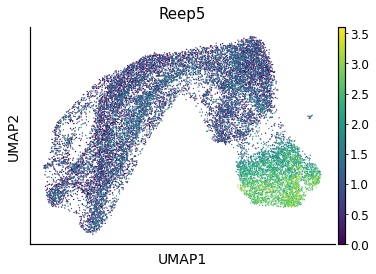

In [9]:
fig = sc.pl.umap(adata, color="Reep5", return_fig=True)

In [10]:
fig.figure.savefig(os.path.join(output_dir, 'Reep5.png'))

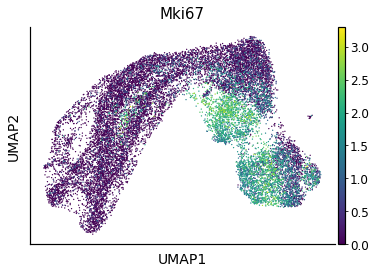

In [11]:
fig = sc.pl.umap(adata, color="Mki67", return_fig=True)

In [12]:
fig.figure.savefig(os.path.join(output_dir, 'Mki67.png'))

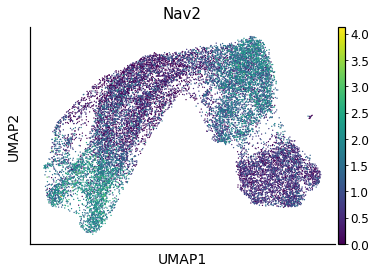

In [13]:
fig = sc.pl.umap(adata, color="Nav2", return_fig=True)

In [14]:
fig.figure.savefig(os.path.join(output_dir, 'Nav2.png'))

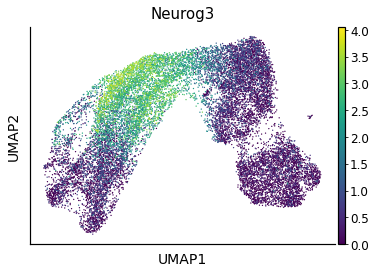

In [15]:
fig = sc.pl.umap(adata, color="Neurog3", return_fig=True)

In [16]:
fig.figure.savefig(os.path.join(output_dir, 'Neurog3.png'))

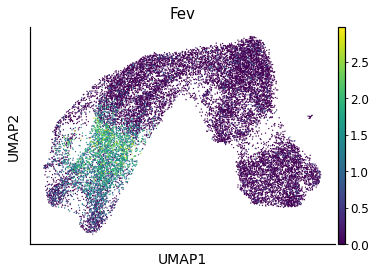

In [17]:
fig = sc.pl.umap(adata, color="Fev", return_fig=True)

In [18]:
fig.figure.savefig(os.path.join(output_dir, 'Fev.png'))

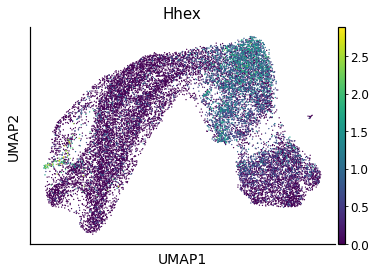

In [19]:
fig = sc.pl.umap(adata, color="Hhex", return_fig=True)

In [20]:
fig.figure.savefig(os.path.join(output_dir, 'Hhex.png'))

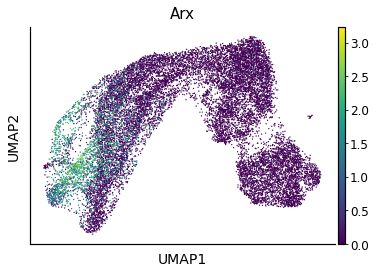

In [21]:
fig = sc.pl.umap(adata, color="Arx", return_fig=True)

In [22]:
fig.figure.savefig(os.path.join(output_dir, 'Arx.png'))

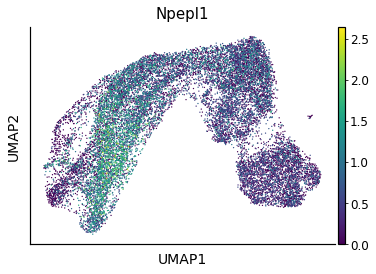

In [23]:
fig = sc.pl.umap(adata, color='Npepl1', return_fig=True)

In [24]:
fig.figure.savefig(os.path.join(output_dir, 'Npepl1.png'))

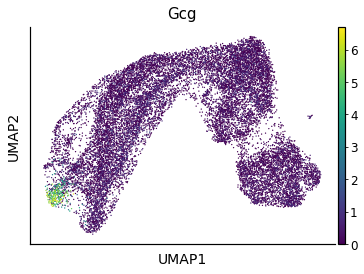

In [25]:
fig = sc.pl.umap(adata, color="Gcg", return_fig=True)

In [26]:
fig.figure.savefig(os.path.join(output_dir, 'Gcg.png'))

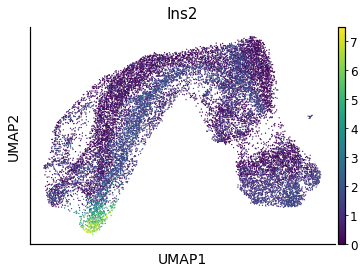

In [27]:
fig = sc.pl.umap(adata, color="Ins2", return_fig=True)

In [28]:
fig.figure.savefig(os.path.join(output_dir, 'Ins2.png'))

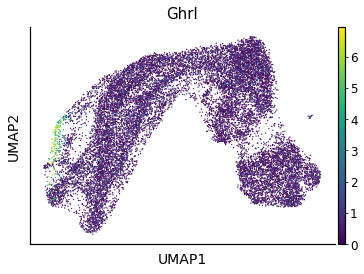

In [29]:
fig = sc.pl.umap(adata, color="Ghrl", return_fig=True)

In [30]:
fig.figure.savefig(os.path.join(output_dir, 'Ghrl.png'))

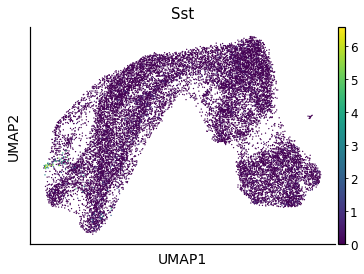

In [31]:
fig = sc.pl.umap(adata, color="Sst", return_fig=True)

In [32]:
fig.figure.savefig(os.path.join(output_dir, 'Sst.png'))

In [33]:
marker_genes = ["Reep5", "Nav2", "Mki67", "Neurog3", "Fev", "Arx", "Npepl1", "Hhex", "Gcg", "Ins2", "Sst", "Ghrl"]


In [34]:
adata.layers["scaled_counts"] = MinMaxScaler().fit_transform(adata.X.A)

In [35]:
order_celltypes = ['Mat. Acinar', 'Imm. Acinar', 'Prlf. Ductal', 'Ductal', 'Ngn3 low', 'Ngn3 high cycling', 'Ngn3 high', 'Eps. progenitors', 'Fev+', 'Fev+ Alpha', 
                   'Fev+ Beta', 'Fev+ Delta', 'Alpha', 'Beta', 'Delta', 'Epsilon']

In [36]:
adata.obs["celltype"] = adata.obs["celltype"].cat.reorder_categories(order_celltypes)

In [37]:
fig = sc.pl.stacked_violin(adata, var_names=marker_genes, groupby="celltype", layer="scaled_counts", return_fig=True)

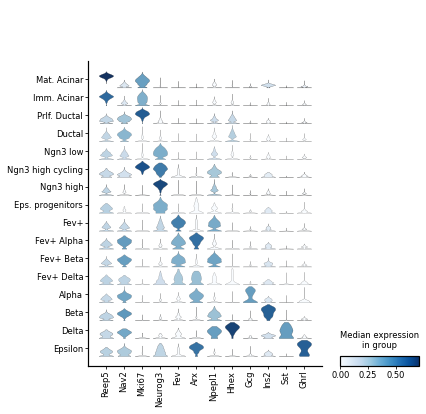

In [38]:
fig.savefig(os.path.join(output_dir, 'stacked_violin_annotation.png'))

In [39]:
cc_genes_regev = [x.strip() for x in open('/lustre/groups/ml01/workspace/moscot_paper/pancreas/regev_cell_cycle_genes.txt')]

s_genes_regev = [gene.lower().capitalize() for gene in cc_genes_regev[:43]]
g2m_genes_regev = [gene.lower().capitalize() for gene in cc_genes_regev[43:]]



In [40]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes_regev, g2m_genes=g2m_genes_regev)

/home/icb/dominik.klein/miniconda3/envs/jax_gpu3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/icb/dominik.klein/miniconda3/envs/jax_gpu3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [41]:
adata.obs['proliferation'] = list(adata.obs['phase'].isin(['G2M','S']))
adata.obs['proliferation'][adata.obs['proliferation']==True] = 'Cycling'
adata.obs['proliferation'][adata.obs['proliferation']==False] = 'Non-Cycling'

/tmp/ipykernel_246186/2311625298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['proliferation'][adata.obs['proliferation']==True] = 'Cycling'


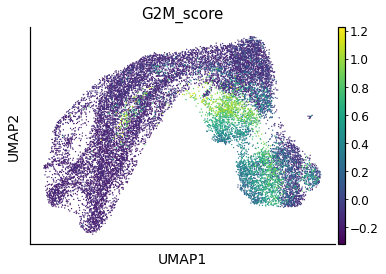

In [42]:
fig = sc.pl.umap(adata, color='G2M_score', return_fig=True)

In [43]:
fig.figure.savefig(os.path.join(output_dir, 'G2M_score.png'))

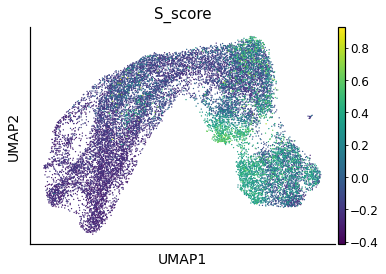

In [44]:
fig = sc.pl.umap(adata, color='S_score', return_fig=True)

In [45]:
fig.figure.savefig(os.path.join(output_dir, 'S_score.png'))

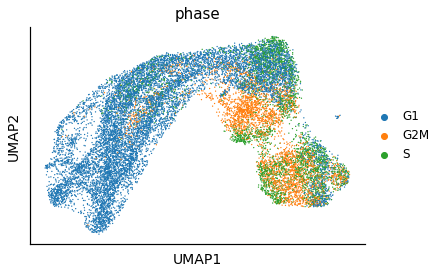

In [46]:
fig = sc.pl.umap(adata, color='phase', return_fig=True)

In [47]:
fig.figure.savefig(os.path.join(output_dir, 'cell_cycle_phase.png'))